In [83]:
#importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import plotly.express as px

In [84]:
df_reviews = pd.read_csv('olist_reviews.csv')

df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7271 entries, 0 to 7270
Data columns (total 31 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   merchant_id                             7271 non-null   object 
 1   lead_id                                 7271 non-null   object 
 2   sdr_id                                  7271 non-null   object 
 3   sr_id                                   7271 non-null   object 
 4   business_segment                        7270 non-null   object 
 5   lead_behavior                           4785 non-null   object 
 6   has_company                             100 non-null    object 
 7   has_gtin                                101 non-null    object 
 8   average_stock                           103 non-null    object 
 9   business_type                           7259 non-null   object 
 10  declared_product_catalog_size           69 non-null     floa

In [85]:
reviews = df_reviews[['review_score','order_id','review_comment_title','review_comment_message']]

reviews.info()

# Replace empty strings with NaN (null values)
reviews = reviews.replace('', pd.np.nan)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7271 entries, 0 to 7270
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   review_score            6780 non-null   float64
 1   order_id                6809 non-null   object 
 2   review_comment_title    2316 non-null   object 
 3   review_comment_message  2805 non-null   object 
dtypes: float64(1), object(3)
memory usage: 227.3+ KB


/var/folders/kn/m6tp1ll909l250fj4x0v2bdc0000gn/T/ipykernel_84869/1880540619.py:6: FutureWarning:

The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.



In [86]:
#Drop what does not have order_id

reviews = reviews.dropna(subset=['order_id'])

# Create a new dataframe with only rows that have a non-null review_comment_message
reviews_w_message = reviews.dropna(subset=['review_comment_message'])


reviews_w_message.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2805 entries, 1 to 7270
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   review_score            2805 non-null   float64
 1   order_id                2805 non-null   object 
 2   review_comment_title    1978 non-null   object 
 3   review_comment_message  2805 non-null   object 
dtypes: float64(1), object(3)
memory usage: 109.6+ KB


## Word Cloud

In [87]:
from wordcloud import WordCloud
import nltk

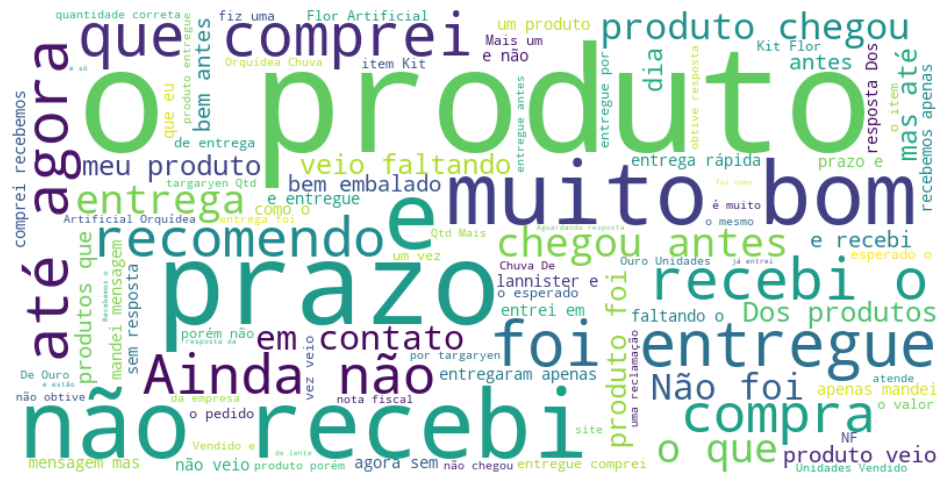

In [88]:
stop_words = nltk.corpus.stopwords.words('portuguese')

# Concatenate all the reviews into a single string
text = ' '.join(str(reviews_w_message) for reviews_w_message in reviews_w_message.review_comment_message if str(reviews_w_message) not in [stop_words])
text += ' '
text += ' '.join(str(reviews_w_message) for reviews_w_message in reviews_w_message.review_comment_message if str(reviews_w_message) not in [stop_words])

# Create a word cloud object
wordcloud = WordCloud(width=800, height=400, max_words=100, background_color='white').generate(text)

# Display the generated wordcloud image
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## GETTING THE SCORE HISTOGRAM

In [89]:
fig = px.histogram(reviews_w_message, x="review_score")
fig.update_traces(marker_color="green",marker_line_color='rgb(8,48,107)',
                  marker_line_width=1.5)
fig.update_layout(title_text='Review Score')
fig.show()

## Calculating the proportion

In [90]:
#Score Percentages

score_counts = reviews_w_message['review_score'].value_counts().sort_index()
score_percentages_total = (score_counts / score_counts.sum() * 100).round(1)

score_percentages_total

1.0    26.5
2.0     9.3
3.0     7.3
4.0    11.4
5.0    45.5
Name: review_score, dtype: float64

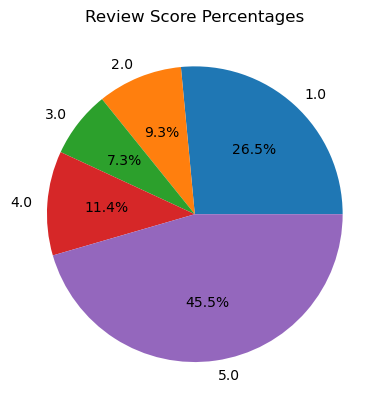

In [91]:
# Create a pie chart

plt.pie(score_percentages_total.values, labels=score_percentages_total.index, autopct='%1.1f%%')
plt.title("Review Score Percentages")
plt.show()

## Understanding the reviews

In [92]:
%pip install textblob

Note: you may need to restart the kernel to use updated packages.


In [93]:
import nltk
from nltk.corpus import stopwords
import pandas as pd
from textblob import TextBlob
from nltk.sentiment import SentimentIntensityAnalyzer


In [94]:
#Convert text to lowercase

reviews_w_message[['review_comment_title', 'review_comment_message']] = reviews_w_message[['review_comment_title', 'review_comment_message']].apply(lambda x: x.str.lower())


/var/folders/kn/m6tp1ll909l250fj4x0v2bdc0000gn/T/ipykernel_84869/3429371214.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [95]:
# Tokenize text and remove stopwords
stop_words = stopwords.words('portuguese')
reviews_w_message['review_comment_message'] = reviews_w_message['review_comment_message'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))


/var/folders/kn/m6tp1ll909l250fj4x0v2bdc0000gn/T/ipykernel_84869/582696717.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [96]:
# Perform sentiment analysis using VADER
sia = SentimentIntensityAnalyzer()
reviews_w_message['sentiment'] = reviews_w_message['review_comment_message'].apply(lambda x: sia.polarity_scores(x)['compound'])
    

/var/folders/kn/m6tp1ll909l250fj4x0v2bdc0000gn/T/ipykernel_84869/500280319.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [97]:
reviews_w_message

,review_score,order_id,review_comment_title,review_comment_message,sentiment
1,5.0,6826d5740591909e368433e2a5ec75fb,NaN,"otima, chegou antes prazo, conforme pedido",0.0
5,4.0,0c89556cf6859f7e4b104f2883aa1b97,recomendo,deveria barato!,0.0
6,4.0,0c89556cf6859f7e4b104f2883aa1b97,recomendo,deveria barato!,0.0
7,4.0,0c89556cf6859f7e4b104f2883aa1b97,recomendo,deveria barato!,0.0
8,4.0,0c89556cf6859f7e4b104f2883aa1b97,recomendo,deveria barato!,0.0
...,...,...,...,...,...
7253,5.0,86661cdf65d5e08c3dc14b073c101d68,NaN,"compra linda, amei canecas",0.0
7255,5.0,a1b442b97cb70e7207abe3f32a01e3d0,NaN,"adorei, produto chegou antes prazo indicado, s...",0.0
7256,3.0,bc3d816db1aa7215dbde5b1b00d3d32b,entrega correta,correu tudo normalmente. mercadoria chegou pra...,0.0
7262,5.0,e1a3812afec72cd377060bfcf9dbf91e,excelente,bom ter adquirido produto.,0.0


In [98]:
## Removing all nulls


reviews = reviews.dropna(subset=['review_comment_message'])

reviews


,review_score,order_id,review_comment_title,review_comment_message
1,5.0,6826d5740591909e368433e2a5ec75fb,NaN,"Otima, chegou até antes do prazo, e conforme o..."
5,4.0,0c89556cf6859f7e4b104f2883aa1b97,Recomendo,Deveria ser mais barato!
6,4.0,0c89556cf6859f7e4b104f2883aa1b97,Recomendo,Deveria ser mais barato!
7,4.0,0c89556cf6859f7e4b104f2883aa1b97,Recomendo,Deveria ser mais barato!
8,4.0,0c89556cf6859f7e4b104f2883aa1b97,Recomendo,Deveria ser mais barato!
...,...,...,...,...
7253,5.0,86661cdf65d5e08c3dc14b073c101d68,NaN,"Minha compra é linda, amei minhas canecas"
7255,5.0,a1b442b97cb70e7207abe3f32a01e3d0,NaN,"Adorei, meu produto chegou antes do prazo indi..."
7256,3.0,bc3d816db1aa7215dbde5b1b00d3d32b,Entrega correta,Correu tudo normalmente. Mercadoria chegou no ...
7262,5.0,e1a3812afec72cd377060bfcf9dbf91e,Excelente,Foi muito bom ter adquirido o produto.


In [99]:
fig = px.histogram(reviews, x="review_score")
fig.update_traces(marker_color="green",marker_line_color='rgb(8,48,107)',
                  marker_line_width=1.5)
fig.update_layout(title_text='Review Score')
fig.show()

## Segment with Score of 1

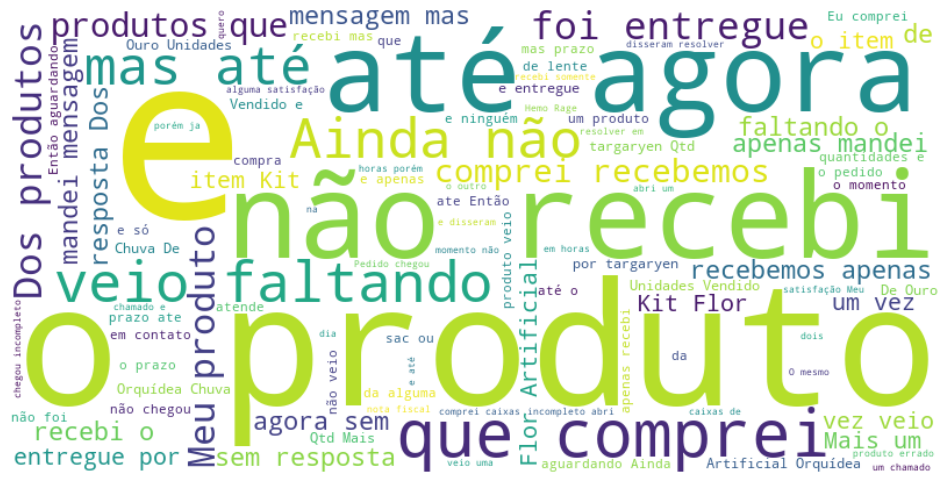

In [121]:
# Filter the reviews by score 1
reviews_1 = reviews[reviews['review_score'] == 1]

stop_words_1 = stopwords.words('portuguese') + ['foi', 'nan', 'que','até','dos','e','eu'] # add more stop words as needed

# Concatenate all the reviews into a single string
text = ' '.join(str(reviews_1) for reviews_1 in reviews_1['review_comment_message'] if str(reviews_1) not in stop_words_1)

# Create a word cloud object
wordcloud = WordCloud(width=800, height=400, max_words=100, background_color='white').generate(text)

# Display the generated wordcloud image
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [101]:
reviews_1[['review_comment_title','review_comment_message']].head(10)


,review_comment_title,review_comment_message
48,Entrega incompleta,Realizei um pedido com dois itens e apenas 1 d...
49,Entrega incompleta,Realizei um pedido com dois itens e apenas 1 d...
79,Ainda aguardo a entrega,Aguardo ainda entrega do produto
80,NaN,O produto e um abridor que simplesmente nao ab...
99,Cadê meu produto,Porque toda vez que tento rastrear meu produto...
106,Luvas,Comprei mas nao veio entrega ainda queria dabe...
174,NaN,Vou devolver o produto.
175,NaN,Vou devolver o produto.
183,Produto errado,"Recebi o produto mais veio errado, ainda não r..."
184,Não recebi os puff´s.,Comprei 2 puffs e um chromebook. A entrega foi...


## Segment with Score of 2

In [104]:
reviews_2


,review_score,order_id,review_comment_title,review_comment_message
61,2.0,af9c76f5f4f218b688c4e235dc38723d,Insatisfação parcial,"Por enquanto recebi apenas um dos produtos, o ..."
62,2.0,af9c76f5f4f218b688c4e235dc38723d,Insatisfação parcial,"Por enquanto recebi apenas um dos produtos, o ..."
355,2.0,9e9e4d3f5d27fab18087abf851da026c,Produto veio com defeito,Duas das colheres vieram rachadas!!
363,2.0,c9a8490e7b2c76d2f9b22369314a9391,Falta de um produto,"Boa noite, conforme informei anteriormente, a ..."
364,2.0,c9a8490e7b2c76d2f9b22369314a9391,Falta de um produto,"Boa noite, conforme informei anteriormente, a ..."
...,...,...,...,...
6904,2.0,17220c71a949903772f1ed32292ee69f,bom,ok
7010,2.0,cc6581115f5706e74610adf4449e5899,Razoável,O produto foi entregue no prazo porém veio com...
7049,2.0,2e1205ef23c9d6445449283ddfe660ad,Diferente,"O produto está diferente da foto, deveriam col..."
7119,2.0,a2a216a3b0034fa46d13dfa2ef86a62c,NaN,NÃO RECEBI O PRODUTO


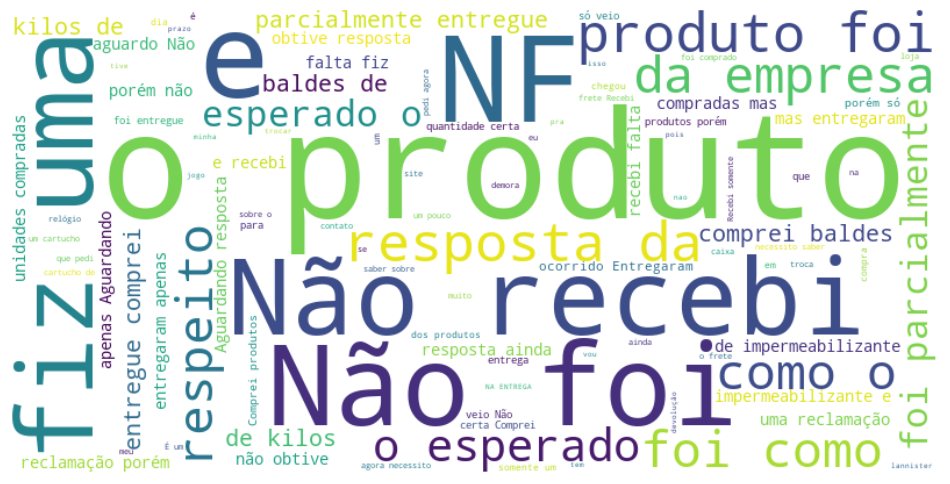

In [120]:
# Filter the reviews by score 1
reviews_2 = reviews[reviews['review_score'] == 2]

stop_words_2 = stopwords.words('portuguese') + ['foi','eu','foi','se','fiz','da'] # add more stop words as needed

# Concatenate all the reviews into a single string
text = ' '.join(str(reviews_2) for reviews_2 in reviews_2['review_comment_message'] if str(reviews_2) not in stop_words_2)

# Create a word cloud object
wordcloud = WordCloud(width=800, height=400, max_words=100, background_color='white').generate(text)

# Display the generated wordcloud image
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## Segment with Score of 3

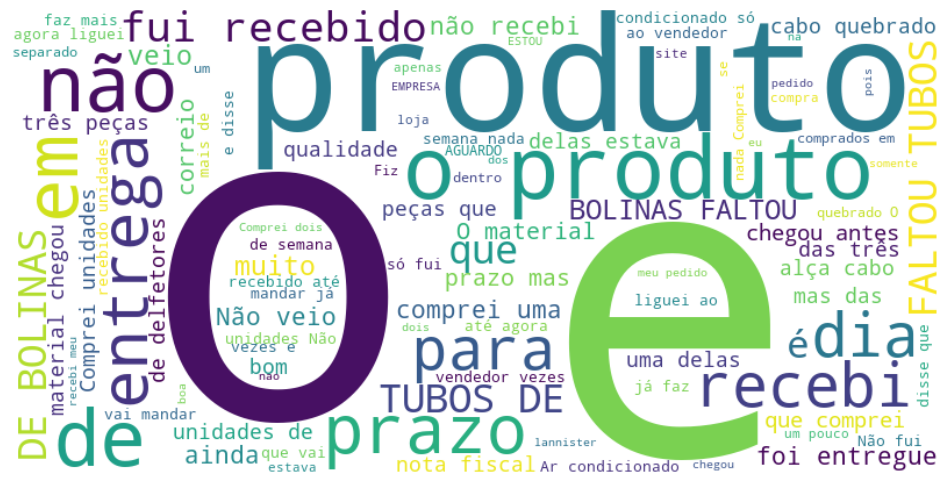

In [119]:
# Filter the reviews by score 3
reviews_3 = reviews[reviews['review_score'] == 3]

stop_words_3 = stopwords.words('portuguese') + ['foi','eu','foi','se','fiz','um','como','e','o','de'] # add more stop words as needed

# Concatenate all the reviews into a single string
text = ' '.join(str(reviews_3) for reviews_3 in reviews_3['review_comment_message'] if str(reviews_3) not in stop_words_3)

# Create a word cloud object
wordcloud = WordCloud(width=800, height=400, max_words=100, background_color='white').generate(text)

# Display the generated wordcloud image
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [112]:
reviews_3

,review_score,order_id,review_comment_title,review_comment_message
82,3.0,fe3b7d7e6df783d622ae530f841bc87e,Quase nota 10,Infelizmente a embalagem do meu baralho veio ...
95,3.0,2bf9fdd42a3609f2c440bec186b10ff7,Produto com defeito,"Bom dia,\r\n\r\nRecebi meu pedido no prazo por..."
96,3.0,2bf9fdd42a3609f2c440bec186b10ff7,Produto com defeito,"Bom dia,\r\n\r\nRecebi meu pedido no prazo por..."
133,3.0,37c3eefe09fbbf5fd314de9cbc9e07a4,NaN,Encomenda estagnou na unidade Cajamar dos Corr...
193,3.0,04b7f4eff7b30fc23df0be1f249113a5,produto estranho,ele deixa um aspecto um tanto quanto oleoso no...
...,...,...,...,...
7246,3.0,4b4b94ef72b5f4fe86ce88a01b54e7a7,NaN,"Recebi um, a compra foram de 2, está faltando 01."
7247,3.0,4b4b94ef72b5f4fe86ce88a01b54e7a7,NaN,"Recebi um, a compra foram de 2, está faltando 01."
7248,3.0,4b4b94ef72b5f4fe86ce88a01b54e7a7,NaN,"Recebi um, a compra foram de 2, está faltando 01."
7249,3.0,4b4b94ef72b5f4fe86ce88a01b54e7a7,NaN,"Recebi um, a compra foram de 2, está faltando 01."


## Segment with Score of 4

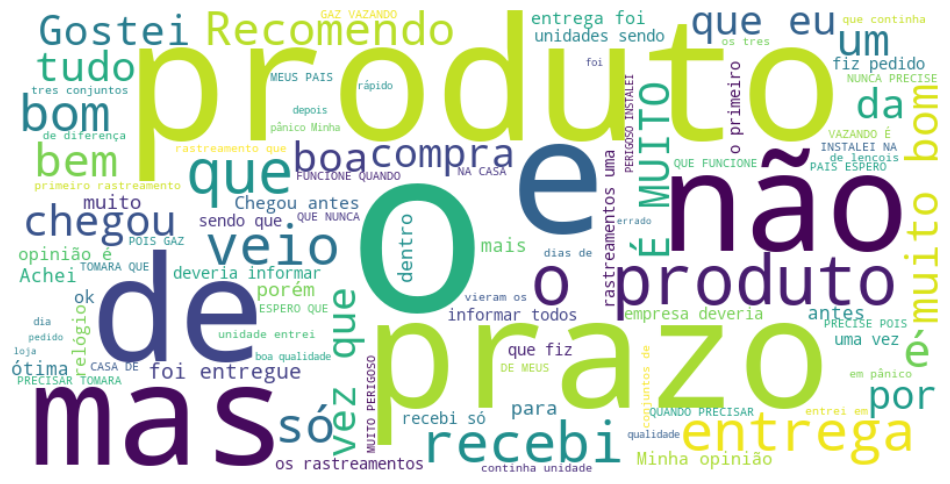

In [122]:
# Filter the reviews by score 4
reviews_4 = reviews[reviews['review_score'] == 4]

stop_words_4 = stopwords.words('portuguese') + ['foi','eu','foi','se','fiz','um','como'] # add more stop words as needed

# Concatenate all the reviews into a single string
text = ' '.join(str(reviews_4) for reviews_4 in reviews_4['review_comment_message'] if str(reviews_4) not in stop_words_4)

# Create a word cloud object
wordcloud = WordCloud(width=800, height=400, max_words=100, background_color='white').generate(text)

# Display the generated wordcloud image
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [123]:
reviews_4

,review_score,order_id,review_comment_title,review_comment_message
5,4.0,0c89556cf6859f7e4b104f2883aa1b97,Recomendo,Deveria ser mais barato!
6,4.0,0c89556cf6859f7e4b104f2883aa1b97,Recomendo,Deveria ser mais barato!
7,4.0,0c89556cf6859f7e4b104f2883aa1b97,Recomendo,Deveria ser mais barato!
8,4.0,0c89556cf6859f7e4b104f2883aa1b97,Recomendo,Deveria ser mais barato!
56,4.0,8f078af5f7dd54fad5abd423dfb4aad2,Tudo certo,Boa
...,...,...,...,...
6944,4.0,4822b9a2b5589396deb0956b2b844afa,Otimo,Recomendaria sim
6945,4.0,4822b9a2b5589396deb0956b2b844afa,Otimo,Recomendaria sim
6946,4.0,4822b9a2b5589396deb0956b2b844afa,Otimo,Recomendaria sim
6961,4.0,884b42885f11cac2abce880659eb1b0b,Ótimo,Foi entregue o produto no prazo e tudo correto


## Segment with Score of 5

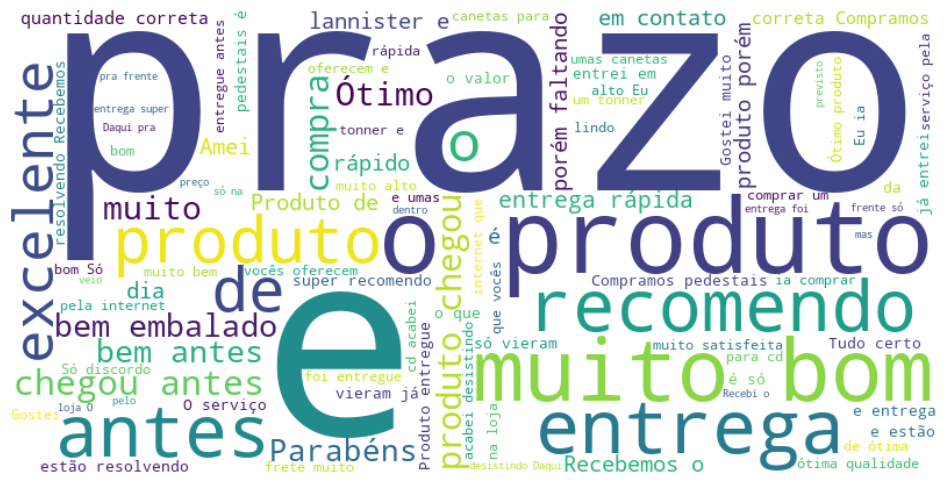

In [124]:
# Filter the reviews by score 4
reviews_5 = reviews[reviews['review_score'] == 5]

stop_words_5 = stopwords.words('portuguese') + ['foi','eu','foi','se','fiz','um','como'] # add more stop words as needed

# Concatenate all the reviews into a single string
text = ' '.join(str(reviews_5) for reviews_5 in reviews_5['review_comment_message'] if str(reviews_5) not in stop_words_5)

# Create a word cloud object
wordcloud = WordCloud(width=800, height=400, max_words=100, background_color='white').generate(text)

# Display the generated wordcloud image
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [126]:
reviews_5

,review_score,order_id,review_comment_title,review_comment_message
1,5.0,6826d5740591909e368433e2a5ec75fb,NaN,"Otima, chegou até antes do prazo, e conforme o..."
47,5.0,434ecca6e51ec65c7ed71199313ac9e1,NaN,Muito bom
64,5.0,b0e61103ba1dee7e3c3c31f68e62a3fb,Tudo certo!,"Produto conforme descrito, muito bom e entrega..."
78,5.0,cf8152b6a51ad306ad09a2d253c8133c,Ótimo,Gastei muito\r\n\r\n
101,5.0,38b1a471932ac62050bd8c14492af2a3,NaN,Otimo.
...,...,...,...,...
7252,5.0,7171245263ae4ceed011a77aed7d612d,Ótimo,Peguei a encomenda no correio.
7253,5.0,86661cdf65d5e08c3dc14b073c101d68,NaN,"Minha compra é linda, amei minhas canecas"
7255,5.0,a1b442b97cb70e7207abe3f32a01e3d0,NaN,"Adorei, meu produto chegou antes do prazo indi..."
7262,5.0,e1a3812afec72cd377060bfcf9dbf91e,Excelente,Foi muito bom ter adquirido o produto.


In [134]:
## Removing all nulls


reviews = reviews.dropna(subset=['review_comment_message'])

reviews = reviews.dropna(subset=['review_comment_title'])

reviews.drop_duplicates(subset=['order_id'], inplace=True)


reviews.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 1238 entries, 5 to 7270
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   review_score            1238 non-null   float64
 1   order_id                1238 non-null   object 
 2   review_comment_title    1238 non-null   object 
 3   review_comment_message  1238 non-null   object 
dtypes: float64(1), object(3)
memory usage: 48.4+ KB


In [136]:
# save the DataFrame to a CSV file

reviews.to_csv('reviews_1.csv', index=False)